In [1]:
import pandas as pd

In [2]:
leads=pd.read_csv("Leads (1).csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Cleaning

In [4]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
leads.shape

(9240, 37)

In [6]:
for col in leads.columns:
    if leads[col].isnull().sum()>3000:
        leads.drop(col,axis=True,inplace=True)

In [7]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
leads.drop(["City"],axis=1,inplace=True)

In [9]:
leads.drop(["Country"],axis=1,inplace=True)

In [10]:
round(leads.isna().sum()/leads.shape[0]*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [11]:
leads["Newspaper"].astype("category").value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [12]:
for column in leads:
    print(leads[column].astype("category").value_counts())
    print("-----------------------------------------------------")    

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
-----------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
-----------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------

In [13]:
leads["Lead Profile"].astype("category").value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [14]:
leads["Specialization"].astype("category").value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
leads["How did you hear about X Education"].astype("category").value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [16]:
leads.drop(["Lead Profile","Specialization","How did you hear about X Education"],axis=1,inplace=True)

In [17]:
leads.drop(["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums",
            "Newspaper","Digital Advertisement","Through Recommendations",
            "Receive More Updates About Our Courses","Update me on Supply Chain Content",
            "Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [18]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
leads.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

In [20]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [21]:
leads=leads[~pd.isnull(leads["What is your current occupation"])]

In [22]:
leads.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [23]:
leads=leads[~pd.isnull(leads["TotalVisits"])]

In [24]:
leads.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [25]:
leads=leads[~pd.isnull(leads["Lead Source"])]

In [26]:
leads.isna().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [27]:
leads.shape[0]

6391

In [28]:
leads.shape[0]/9240

0.6916666666666667

In [29]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [30]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [31]:
leads.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [32]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [33]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [34]:
temp=leads.loc[:,leads.dtypes=="object"]

In [35]:
temp.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Last Activity                             object
What is your current occupation           object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [36]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [38]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
leads=pd.concat([leads,dummy],axis=1)

In [40]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,...,0,0,0,1,0,0,0,0,0,0


In [41]:
leads=leads.drop(["Lead Origin", "Lead Source", "Do Not Email", "Last Activity",
       "What is your current occupation",
       "A free copy of Mastering The Interview", "Last Notable Activity"],axis=1)

In [42]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [43]:
leads.dtypes

Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Origin_Lead Import                                   uint8
Lead Source_Direct Traffic                                uint8
Lead Source_Facebook                                      uint8
Lead Source_Google                                        uint8
Lead Source_Live Chat                                     uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Organic Search                                uint8
Lead Source_Pay per Click Ads                             uint8
Lead Source_Press_Release                                 uint8
Lead Source_Reference                   

In [44]:
x=leads.drop("Converted",axis=1)

In [45]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
x.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [47]:
y=leads["Converted"]

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1000,test_size=0.3,stratify=y)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

In [52]:
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

<ipython-input-52-b9c0cb47c4d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
C:\Users\sajan\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7591,0.007968,0.026408,0.036364,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9197,0.019920,0.212588,0.090909,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7797,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5403,0.031873,0.422535,0.048545,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6958,0.011952,0.324824,0.027273,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logreg=LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE

In [57]:
rfe=RFE(logreg,15)

C:\Users\sajan\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [58]:
rfe=rfe.fit(x_train,y_train)

C:\Users\sajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sajan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [59]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 37),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 41),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 17),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 18),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Cl

In [60]:
col=x_train.columns[rfe.support_]

In [61]:
x_train=x_train[col]

In [62]:
import statsmodels.api as sm

In [63]:
x_train_sm=sm.add_constant(x_train)

In [64]:
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())

In [65]:
a=logm2.fit()

In [66]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.7
Date:                Tue, 12 Jan 2021   Deviance:                       4141.3
Time:                        17:05:26   Pearson chi2:                 4.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2372      0.093    -23.938      0.000      -2.420      -2.054
TotalVisits                                             10.9255      2.581      4.233      0.000       5.866      15.985
Total Time Spent on Website                              4.4594      0.185     24.080      0.000       4.096       4.822
Lead Origin_Lead Add Form                                3.8420      0.232     16.551      0.000       3.387       4.297
Lead Source_Olark Chat                                   1.6281      0.127     12.820      0.000       1.379       1.877
Lead Source_Welingak Website                             1.7534      0.753      2.328      0.020       0.277       3.229
Do Not Email_Yes                                        -1.4956      0.227     -6.590      0.000      -1.940      -1.051
Last Activity_Email Bounced                             -1.5761      0.609     -2.588      0.010      -2.770      -0.383
Last Activity_Had a Phone Conversation                   0.1985      1.015      0.195      0.845      -1.791       2.188
Last Activity_Olark Chat Conversation                   -1.1931      0.188     -6.363      0.000      -1.561      -0.826
Last Activity_SMS Sent                                   1.0780      0.083     12.950      0.000       0.915       1.241
What is your current occupation_Housewife               24.1555   3.32e+04      0.001      0.999    -6.5e+04    6.51e+04
What is your current occupation_Working Professional     2.4081      0.184     13.104      0.000       2.048       2.768
Last Notable Activity_Email Bounced                      1.9732      0.766      2.576      0.010       0.472       3.475
Last Notable Activity_Had a Phone Conversation          23.6185   2.01e+04      0.001      0.999   -3.95e+04    3.95e+04
Last Notable Activity_Unreachable                        3.1985      1.072      2.983      0.003       1.097       5.300
========================================================================================================================
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,2.0
5,Do Not Email_Yes,2.0
6,Last Activity_Email Bounced,2.0
7,Last Activity_Had a Phone Conversation,2.0
9,Last Activity_SMS Sent,2.0
13,Last Notable Activity_Had a Phone Conversation,2.0
0,TotalVisits,1.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Olark Chat,1.0
4,Lead Source_Welingak Website,1.0


In [69]:
x_train.drop("What is your current occupation_Housewife",axis=1,inplace=True)

In [70]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2074.3
Date:                Tue, 12 Jan 2021   Deviance:                       4148.7
Time:                        17:05:27   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2286      0.093    -23.905      0.000      -2.411      -2.046
TotalVisits                                             10.8460      2.575      4.212      0.000       5.799      15.893
Total Time Spent on Website                              4.4541      0.185     24.081      0.000       4.092       4.817
Lead Origin_Lead Add Form                                3.8421      0.232     16.564      0.000       3.387       4.297
Lead Source_Olark Chat                                   1.6222      0.127     12.787      0.000       1.374       1.871
Lead Source_Welingak Website                             1.7475      0.753      2.321      0.020       0.272       3.223
Do Not Email_Yes                                        -1.4964      0.227     -6.596      0.000      -1.941      -1.052
Last Activity_Email Bounced                             -1.5798      0.609     -2.595      0.009      -2.773      -0.387
Last Activity_Had a Phone Conversation                   0.1934      1.015      0.191      0.849      -1.796       2.182
Last Activity_Olark Chat Conversation                   -1.1964      0.187     -6.383      0.000      -1.564      -0.829
Last Activity_SMS Sent                                   1.0729      0.083     12.899      0.000       0.910       1.236
What is your current occupation_Working Professional     2.4044      0.184     13.087      0.000       2.044       2.764
Last Notable Activity_Email Bounced                      1.9738      0.766      2.577      0.010       0.473       3.475
Last Notable Activity_Had a Phone Conversation          22.6187   1.22e+04      0.002      0.999   -2.39e+04     2.4e+04
Last Notable Activity_Unreachable                        3.1928      1.072      2.978      0.003       1.091       5.294
========================================================================================================================
"""

In [71]:
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,2.0
5,Do Not Email_Yes,2.0
6,Last Activity_Email Bounced,2.0
7,Last Activity_Had a Phone Conversation,2.0
9,Last Activity_SMS Sent,2.0
12,Last Notable Activity_Had a Phone Conversation,2.0
0,TotalVisits,1.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Olark Chat,1.0
4,Lead Source_Welingak Website,1.0


In [72]:
x_train.drop("Last Activity_Had a Phone Conversation",axis=1,inplace=True)

In [73]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2074.4
Date:                Tue, 12 Jan 2021   Deviance:                       4148.7
Time:                        17:05:27   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2280      0.093    -23.913      0.000      -2.411      -2.045
TotalVisits                                             10.8486      2.575      4.212      0.000       5.801      15.896
Total Time Spent on Website                              4.4536      0.185     24.082      0.000       4.091       4.816
Lead Origin_Lead Add Form                                3.8416      0.232     16.563      0.000       3.387       4.296
Lead Source_Olark Chat                                   1.6218      0.127     12.786      0.000       1.373       1.870
Lead Source_Welingak Website                             1.7476      0.753      2.321      0.020       0.272       3.224
Do Not Email_Yes                                        -1.4963      0.227     -6.595      0.000      -1.941      -1.052
Last Activity_Email Bounced                             -1.5805      0.609     -2.596      0.009      -2.774      -0.387
Last Activity_Olark Chat Conversation                   -1.1968      0.187     -6.385      0.000      -1.564      -0.829
Last Activity_SMS Sent                                   1.0724      0.083     12.899      0.000       0.909       1.235
What is your current occupation_Working Professional     2.4051      0.184     13.095      0.000       2.045       2.765
Last Notable Activity_Email Bounced                      1.9738      0.766      2.577      0.010       0.473       3.475
Last Notable Activity_Had a Phone Conversation          22.8115   1.22e+04      0.002      0.999   -2.39e+04     2.4e+04
Last Notable Activity_Unreachable                        3.1922      1.072      2.978      0.003       1.091       5.294
========================================================================================================================
"""

In [74]:
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,2.0
5,Do Not Email_Yes,2.0
6,Last Activity_Email Bounced,2.0
8,Last Activity_SMS Sent,2.0
0,TotalVisits,1.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Olark Chat,1.0
4,Lead Source_Welingak Website,1.0
7,Last Activity_Olark Chat Conversation,1.0
9,What is your current occupation_Working Profes...,1.0


In [75]:
x_train.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

In [76]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.1
Date:                Tue, 12 Jan 2021   Deviance:                       4166.2
Time:                        17:05:27   Pearson chi2:                 4.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2182      0.093    -23.813      0.000      -2.401      -2.036
TotalVisits                                             11.2679      2.598      4.337      0.000       6.176      16.360
Total Time Spent on Website                              4.4411      0.184     24.085      0.000       4.080       4.802
Lead Origin_Lead Add Form                                3.8367      0.232     16.543      0.000       3.382       4.291
Lead Source_Olark Chat                                   1.6175      0.127     12.756      0.000       1.369       1.866
Lead Source_Welingak Website                             1.7501      0.753      2.324      0.020       0.274       3.226
Do Not Email_Yes                                        -1.5033      0.227     -6.630      0.000      -1.948      -1.059
Last Activity_Email Bounced                             -1.5821      0.608     -2.600      0.009      -2.775      -0.390
Last Activity_Olark Chat Conversation                   -1.2052      0.187     -6.433      0.000      -1.572      -0.838
Last Activity_SMS Sent                                   1.0609      0.083     12.784      0.000       0.898       1.224
What is your current occupation_Working Professional     2.3978      0.184     13.063      0.000       2.038       2.758
Last Notable Activity_Email Bounced                      1.9717      0.766      2.575      0.010       0.471       3.472
Last Notable Activity_Unreachable                        3.1786      1.072      2.965      0.003       1.078       5.280
========================================================================================================================
"""

In [77]:
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,2.0
5,Do Not Email_Yes,2.0
6,Last Activity_Email Bounced,2.0
8,Last Activity_SMS Sent,2.0
0,TotalVisits,1.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Olark Chat,1.0
4,Lead Source_Welingak Website,1.0
7,Last Activity_Olark Chat Conversation,1.0
9,What is your current occupation_Working Profes...,1.0


In [78]:
y_train_pred=a.predict(x_train_sm)

In [79]:
y_train_pred=y_train_pred.values.reshape(-1)

In [80]:
y_train_pred[:10]

array([0.27801721, 0.25511645, 0.14159266, 0.7452323 , 0.37154944,
       0.42357815, 0.61513878, 0.04070336, 0.93087856, 0.76856581])

In [81]:
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Conversion":y_train_pred})

In [82]:
y_train_pred_final.head(10)

,Converted,Conversion
0,0,0.278017
1,1,0.255116
2,0,0.141593
3,1,0.745232
4,0,0.371549
5,0,0.423578
6,0,0.615139
7,0,0.040703
8,1,0.930879
9,1,0.768566


In [83]:
y_train_pred_final["predicted"]=y_train_pred_final.Conversion.map(lambda x:1 if x>0.5 else 0)

In [84]:
y_train_pred_final.head()

,Converted,Conversion,predicted
0,0,0.278017,0
1,1,0.255116,0
2,0,0.141593,0
3,1,0.745232,1
4,0,0.371549,0


In [85]:
from sklearn import metrics

In [86]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

In [87]:
confusion

array([[1931,  397],
       [ 545, 1600]], dtype=int64)

In [88]:
confusion.sum()

4473

In [89]:
#predicted         not_converted    converted
#actual
#not_converted         TN             FP
#converted             FN             TP

In [90]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.789403085177733

In [91]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [92]:
#sensitivity
TP/(TP+FN)

0.745920745920746

In [93]:
#specificity
TN/(TN+FP)

0.8294673539518901

In [94]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="ROC curve (area=%0.2f)" % auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [95]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion)

In [96]:
import matplotlib.pyplot as plt

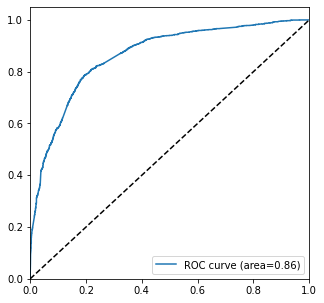

In [97]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion)

In [98]:
numbers=[float(x/10) for x in range(10)]

In [99]:
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion.map(lambda x: 1 if x>i else 0)
    

In [100]:
y_train_pred_final.head(10)

,Converted,Conversion,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.278017,0,1,1,1,0,0,0,0,0,0,0
1,1,0.255116,0,1,1,1,0,0,0,0,0,0,0
2,0,0.141593,0,1,1,0,0,0,0,0,0,0,0
3,1,0.745232,1,1,1,1,1,1,1,1,1,0,0
4,0,0.371549,0,1,1,1,1,0,0,0,0,0,0
5,0,0.423578,0,1,1,1,1,1,0,0,0,0,0
6,0,0.615139,1,1,1,1,1,1,1,1,0,0,0
7,0,0.040703,0,1,0,0,0,0,0,0,0,0,0
8,1,0.930879,1,1,1,1,1,1,1,1,1,1,1
9,1,0.768566,1,1,1,1,1,1,1,1,1,0,0


In [101]:
cutoff_df=pd.DataFrame(columns=["prob","accuracy","sensitivity","specificity"])

In [102]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [103]:
for i in numbers:
    cm1=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0] + cm1[1,1])/total1
    specificity=(cm1[0,0])/(cm1[0,0]+cm1[0,1])
    sensitivity=(cm1[1,1])/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]

In [104]:
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.479544,1.000000,0.000000
0.1,0.1,0.535435,0.993007,0.113832
0.2,0.2,0.712497,0.939394,0.503436
0.3,0.3,0.759893,0.899767,0.631014
0.4,0.4,0.792309,0.810256,0.775773
0.5,0.5,0.789403,0.745921,0.829467
0.6,0.6,0.774648,0.676923,0.864691
0.7,0.7,0.741784,0.552914,0.915808
0.8,0.8,0.710932,0.448019,0.953179
0.9,0.9,0.641851,0.274126,0.980670


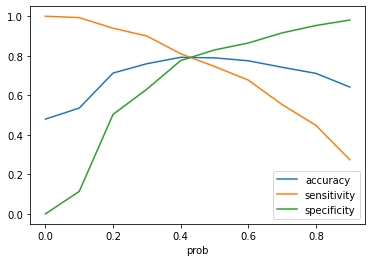

In [105]:
cutoff_df.plot.line(x="prob",y=["accuracy","sensitivity","specificity"])
plt.show()